# Interactive Visualization Lab

Complete the following set of exercises to solidify your knowledge of interactive visualization using Plotly, Cufflinks, and IPyWidgets.

In [1]:
import pandas as pd;
import plotly.offline as py;
from plotly import tools;
import plotly.graph_objs as go;
import warnings;
from ipywidgets import interact;

warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
data = pd.read_excel('./data/Online_Retail.xlsx');

In [3]:
data.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


#### 1. Create an interactive bar chart showing total quantity and revenue by country (excluding United Kingdom) for the month of April 2011.

In [4]:
# Transform the data
april = data[(data['InvoiceDate'] >= '2011-04-01') & 
             (data['InvoiceDate'] < '2011-05-01') & 
             (data['Country'] != 'United Kingdom')];

total_qty_rvn = april.groupby('Country').sum()[['Quantity', 'Revenue']];

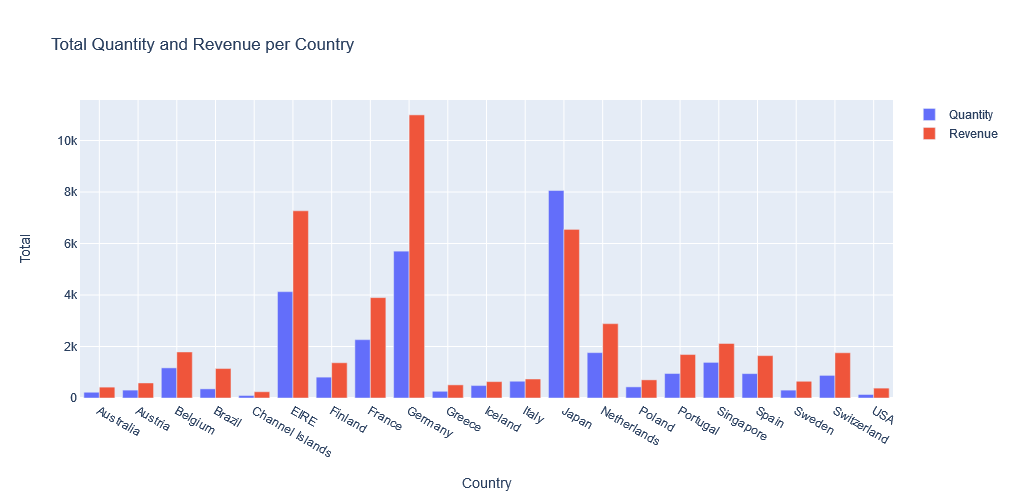

In [5]:
# Traces
traces = [go.Bar(x=total_qty_rvn.index, y=total_qty_rvn[column], name=column) for column in total_qty_rvn.columns];

# Layout
layout = go.Layout(barmode='group', width=1000, height=500,
                   xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Country')),
                   yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Total')),
                   title=go.layout.Title(text='Total Quantity and Revenue per Country'));

# Plot
py.iplot(go.Figure(data=traces, layout=layout));

#### 2. Create an interactive line chart showing quantity and revenue sold to France between January 1st and May 31st 2011.

In [6]:
# Transform the data
france_5m_2011 = data[(data['InvoiceDate'] >= '2011-01-01') & 
             (data['InvoiceDate'] <= '2011-05-31') & 
             (data['Country'] == 'France')];

france_5m_2011['InvoiceDate'] = france_5m_2011['InvoiceDate'].apply(lambda row: row.strftime("%m/%d"));

france_qty_rvn = france_5m_2011.groupby('InvoiceDate').sum()[['Quantity', 'Revenue']];

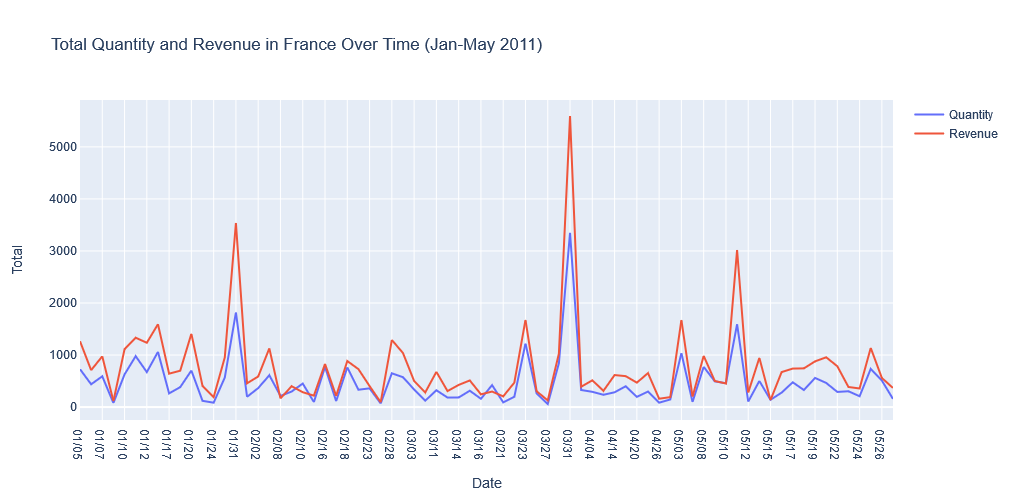

In [7]:
# Traces
traces = [go.Scatter(x=france_qty_rvn.index, y=france_qty_rvn[column], name=column) 
          for column in france_qty_rvn.columns];

# Layout
layout = go.Layout(width=1000, height=500,
                   xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date')),
                   yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Total')),
                   title=go.layout.Title(text='Total Quantity and Revenue in France Over Time (Jan-May 2011)'));

# Plot
py.iplot(go.Figure(data=traces, layout=layout));

#### 3. Create an interactive scatter plot showing the relationship between average quantity (x-axis) and average unit price (y-axis) for the product PARTY BUNTING with the plot points color-coded by country (categories).

In [8]:
# Transform the data
party_bunting = data[(data['Description'] == 'PARTY BUNTING') ];
pb_country_qty_up = party_bunting.groupby('Country').mean()[['Quantity', 'UnitPrice']];

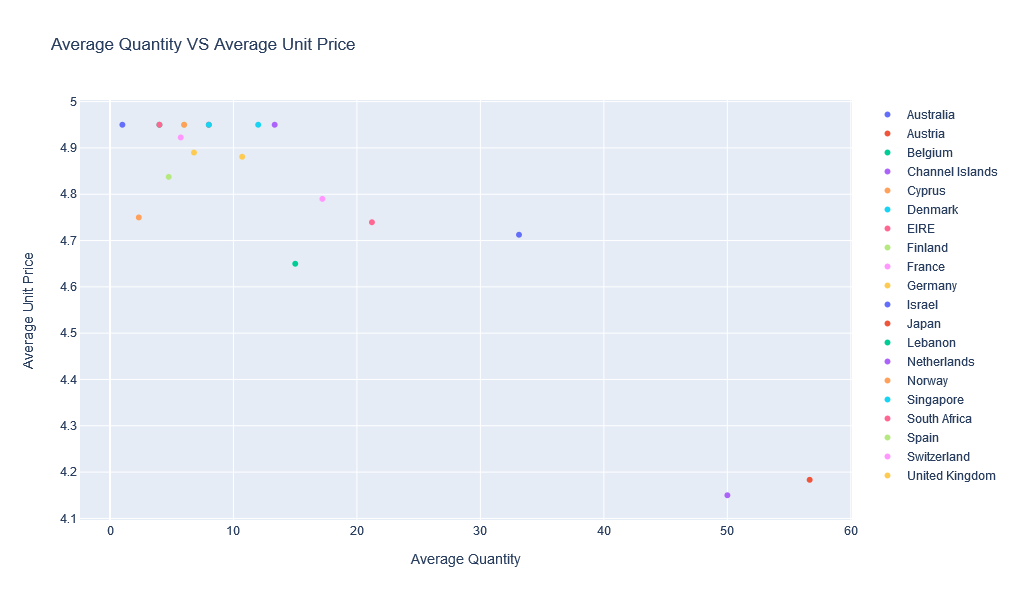

In [9]:
# Traces
traces = [go.Scatter(x=[pb_country_qty_up['Quantity'][country]], 
                     y=[pb_country_qty_up['UnitPrice'][country]], 
                     mode='markers',
                     name=country)
          for country in pb_country_qty_up.index];

# Layout 
layout = go.Layout(width=700, height=600,
                   xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Average Quantity')),
                   yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Average Unit Price')),
                   title=go.layout.Title(text='Average Quantity VS Average Unit Price'));
# Plot
py.iplot(go.Figure(data=traces, layout=layout));

#### 4. Create a set of interactive histograms showing the distributions of quantity per invoice for the following countries: EIRE, Germany, France, and Netherlands.

In [10]:
# Transform the data
countries = ['EIRE', 'Germany', 'France', 'Netherlands'];
qty_invc = data[data['Country'].isin(countries)];
qty_invc = qty_invc[['InvoiceNo', 'Quantity', 'Country']].pivot_table(index='InvoiceNo', 
                                                                      columns='Country', 
                                                                      values='Quantity', 
                                                                      aggfunc='sum');

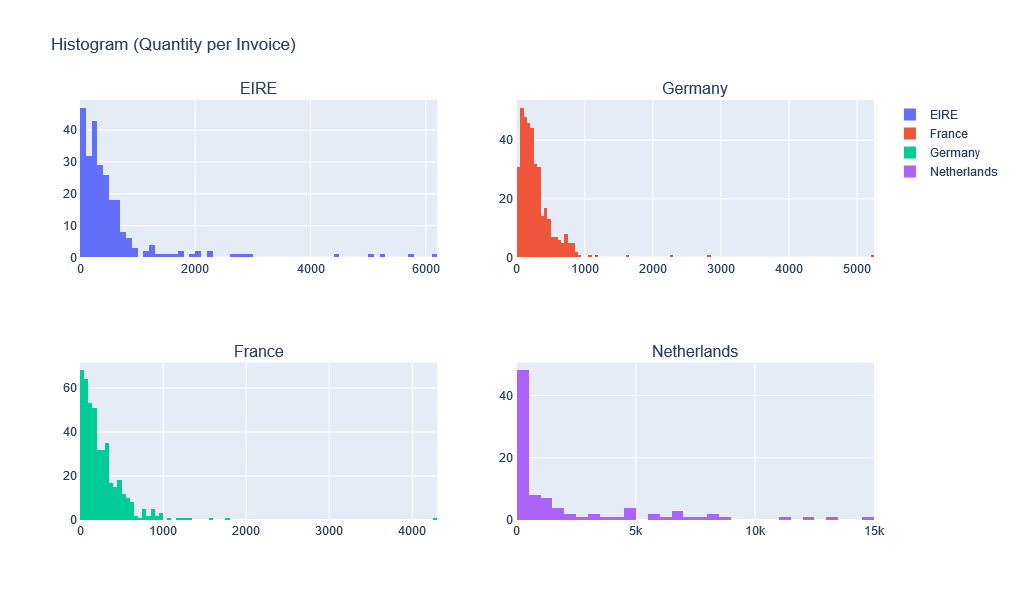

In [11]:
# Traces
traces = [go.Histogram(x=qty_invc[country], name=country) for country in qty_invc.columns];

# Subplots
fig = tools.make_subplots(rows=2, cols=2, subplot_titles=tuple(countries), print_grid=False);
subplots = pd.MultiIndex.from_product([range(1,3), range(1,3)]);
for trace, subplot in zip(traces, subplots):
    fig.append_trace(trace, subplot[0], subplot[1]);

# Layout
fig['layout'].update(width=1000, height=600, title='Histogram (Quantity per Invoice)');

# Plot
py.iplot(fig);

#### 5. Create an interactive side-by-side bar chart showing the revenue by country listed below (bars) for each of the products listed below.

In [12]:
# Variables
product_list = ['JUMBO BAG RED RETROSPOT', 
                'CREAM HANGING HEART T-LIGHT HOLDER',
                'REGENCY CAKESTAND 3 TIER']

country_list = ['EIRE', 'Germany', 'France', 'Netherlands']

In [13]:
# Transform the data
rvn_country = data[data['Country'].isin(country_list) &
                   data['Description'].isin(product_list)]
rvn_country = rvn_country.pivot_table(index='Country', columns='Description', values='Revenue', aggfunc='sum');

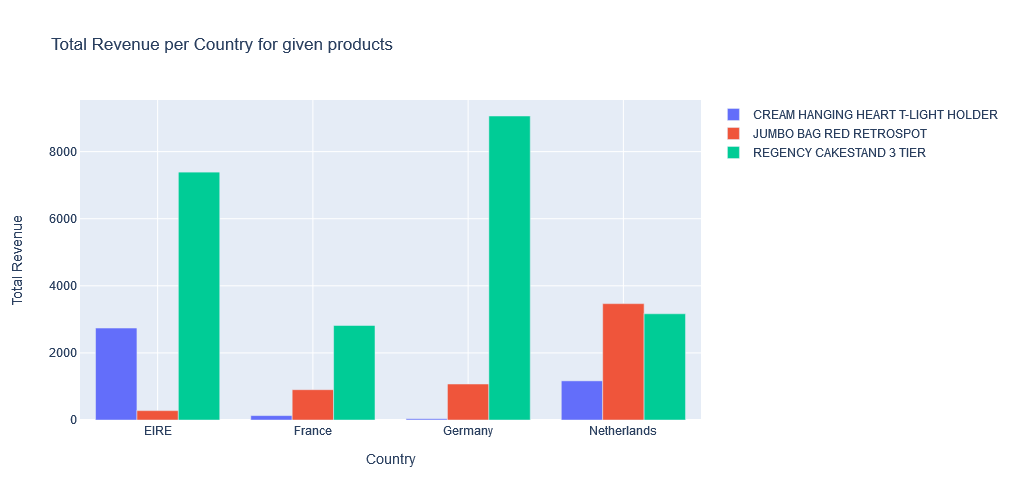

In [14]:
# Traces
traces = [go.Bar(x=rvn_country.index, y=rvn_country[column], name=column) for column in rvn_country.columns];

# Layout
layout = go.Layout(barmode='group', width=1000, height=500,
                   xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Country')),
                   yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Total Revenue')),
                   title=go.layout.Title(text='Total Revenue per Country for given products'));

# Plot
py.iplot(go.Figure(data=traces, layout=layout));

#### 6. Create an interactive line chart showing quantity sold by day for the United Kingdom. Add drop-down boxes for Year and Month that allow you to filter the date range that appears in the chart.

In [15]:
# Transform the data
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year;
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month;
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day;
uk = data[data['Country']=='United Kingdom'];

In [16]:
# Variables
years = uk['Year'].unique();
months = uk['Month'].unique();
months.sort();

In [17]:
# Interactive menu
@interact(year=years, 
          month=months)

# Update function
def linechart(year=2011, month=4):
    # Transform the data
    sales_date = uk[(uk['Year']==year) & (uk['Month']==month)];
    sales_day = sales_date.groupby('Day').sum()['Quantity'];
    # Traces
    traces = [go.Scatter(x=sales_day.index, y=sales_day)];
    # Layout
    layout = go.Layout(width=1000, height=500,
                       xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Day')),
                       yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Quantity')),
                       title=go.layout.Title(text=f'Total Quantity sold in UK ({month}-{year})'));
    # Plot
    py.iplot(go.Figure(data=traces, layout=layout));

interactive(children=(Dropdown(description='year', index=1, options=(2010, 2011), value=2011), Dropdown(descri…

#### 7. Create an interactive scatter plot that plots number of invoices (x-axis) vs. number of customers (y-axis) and the plot points represent individual products. Add two sliders that control the x and y axis ranges.

In [18]:
# Transform the data
agg_func = {'InvoiceNo':'nunique',
            'Quantity':'sum',
            'UnitPrice':'mean',
            'Revenue':'sum',
            'CustomerID':'nunique'}

products = uk.groupby('Description').agg(agg_func)[['InvoiceNo', 'CustomerID']]

In [19]:
# Interactive menu
@interact(invoices=(products['InvoiceNo'].min(), products['InvoiceNo'].max(), 10), 
          customers=(products['CustomerID'].min(), products['CustomerID'].max(), 10))

# Update function
def scatter(invoices=1, customers=1):
    # Transform the data
    filtered = products[(products['CustomerID'] > customers) & 
                  (products['InvoiceNo'] > invoices)]
    # Traces
    traces = [go.Scatter(x=filtered['InvoiceNo'], 
                         y=filtered['CustomerID'], 
                         mode='markers')]
    # Layout 
    layout = go.Layout(width=700, height=600,
                       xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='#Invoices')),
                       yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='#Customers')),
                       title=go.layout.Title(text='Number of Invoices VS Number of Customers'));
    # Plot
    py.iplot(go.Figure(data=traces, layout=layout));

interactive(children=(IntSlider(value=1, description='invoices', max=1891, min=1, step=10), IntSlider(value=1,…

#### 8. Create an interactive bar chart that shows revenue by product description. Add a text field widget that filters the results to show the product that contain the text entered in their description.

In [20]:
# Interactive menu
@interact(product='')

# Update function
def chart(product):
    # Transform the data
    filtered = data[data['Description'].str.contains(product.upper())]
    prdct_rvn = filtered.groupby('Description')['Revenue'].sum()
    # Traces
    traces = [go.Bar(x=prdct_rvn.index, y=prdct_rvn)];
    # Layout
    layout = go.Layout(width=1000, height=500,
                   yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Total Revenue')),
                   title=go.layout.Title(text='Total Revenue per Product'));
    # Plot
    py.iplot(go.Figure(data=traces, layout=layout));

interactive(children=(Text(value='', description='product'), Output()), _dom_classes=('widget-interact',))